<div style="text-align: justify">

##### We have Multiclass classification Problem. The objective of this form of supervised learning problem in machine learning is to classify instances into one of at least three classes. Thus, the output variable or target variable may have more than two possible outcomes. In a multiclass classification problem, the input data consists of a set of features or attributes, and the output variable is a categorical variable with multiple potential values or classes. 

##### This multiclass classification problem could entail classifying credit score into three distinct categories, such as "poor," "standard" and "good." In this situation, we are working with a multiclass classification problem, hence we cannot utilize a binary classification metrics. `Accuracy`, `Confusion Matrix`, `Correlation Plot`, and `F1 Score` are going to be the performance measurements that we use.

##### F1 scores range from 0 to 1, with 1 being the best. A model with a high F1 score has high precision and recall, avoiding false positives and negatives and properly recognizing significant data points. The average F1 score for a multiclass classification problem is calculated using the macro F1 score. The weighted F1 score takes class imbalance into consideration when calculating the average F1 score for a multiclass classification issue.



In [1]:
!pip install xgboost==1.7.5

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, f1_score

In [3]:
df = pd.read_csv('after_fe_outlier.csv')

In [4]:
x = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [5]:
y_le = LabelEncoder()
y_Encode = y_le.fit_transform(y)

### Scaling Down to Data

In [6]:
scaler = MinMaxScaler()
scaler.fit(x) 
scaled_values = scaler.transform(x)
x.loc[:,:] = scaled_values
x

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History,Missed_Payment_Day
0,0.000000,0.214286,0.857143,0.044713,0.102087,0.272727,0.363636,0.060606,0.444444,0.044776,...,1.0,0.162020,0.227421,0.0,0.009933,0.040669,0.4,0.195056,0.655087,1.0
1,0.142857,0.214286,0.857143,0.044713,0.102087,0.272727,0.363636,0.060606,0.444444,0.014925,...,1.0,0.162020,0.398165,0.0,0.009933,0.059818,0.6,0.177663,0.669975,1.0
2,0.285714,0.214286,0.857143,0.044713,0.102087,0.272727,0.363636,0.060606,0.444444,0.044776,...,1.0,0.162020,0.286978,0.0,0.009933,0.041318,0.8,0.206739,0.660050,1.0
3,0.428571,0.214286,0.857143,0.044713,0.102087,0.272727,0.363636,0.060606,0.444444,0.074627,...,1.0,0.162020,0.379262,0.0,0.009933,0.100873,1.0,0.139475,0.662531,1.0
4,0.571429,0.214286,0.857143,0.044713,0.102087,0.272727,0.363636,0.060606,0.444444,0.089552,...,1.0,0.162020,0.159912,0.0,0.009933,0.020948,0.2,0.213155,0.665012,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.428571,0.261905,0.642857,0.120471,0.205072,0.363636,0.545455,0.181818,0.222222,0.343284,...,1.0,0.100473,0.488786,0.0,0.007033,0.030835,0.0,0.299531,0.935484,1.0
99996,0.571429,0.261905,0.642857,0.120471,0.205072,0.363636,0.545455,0.181818,0.222222,0.268657,...,1.0,0.100473,0.685521,0.0,0.007033,0.027404,0.2,0.310009,0.937965,1.0
99997,0.714286,0.261905,0.642857,0.120471,0.205072,0.363636,0.545455,0.181818,0.222222,0.402985,...,1.0,0.100473,0.708517,0.0,0.007033,0.012152,0.0,0.322591,0.940447,1.0
99998,0.857143,0.261905,0.642857,0.120471,0.205072,0.363636,0.545455,0.181818,0.222222,0.298507,...,1.0,0.100473,0.454607,0.0,0.007033,0.127279,0.6,0.199220,0.942928,1.0


#### Defining Model Evaluation (using Confusion Matrix), Feature Importance and F1 Score Functions

In [7]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])
    fig, ax = plt.subplots(figsize=(5,5))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [8]:
def feature_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(15,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.gca().invert_yaxis()
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

In [9]:
def evaluate_f1_score(y_test, y_pred):
    # Calculate F1 score for each class
    f1_scores = f1_score(y_test, y_pred, average=None)
    print("F1 score for each class:", f1_scores)

    # Calculate and print macro-average F1 score
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    print("Macro-average F1 score:", macro_f1)

    # Calculate and print weighted-average F1 score
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    print("Weighted-average F1 score:", weighted_f1)

    return f1_scores, macro_f1, weighted_f1

In [101]:
max_depth_range = np.arange(1,20)
def model_tuning(model, x_train, y_train, x_test, y_test, max_depth_range):
    training_acc={}
    test_acc={}
    
    for max_d in max_depth_range:
        model.set_params(max_depth=max_d)
        model.fit(x_train, y_train)

        training_acc[max_d] = model.score(x_train, y_train)
        test_acc[max_d] = model.score(x_test, y_test)

    # visualize test and training accuracies
    fig, ax = plt.subplots()
    ax.plot(max_depth_range, training_acc.values(), label="Training")
    ax.plot(max_depth_range, test_acc.values(), label="Test")
    plt.legend(["Training","Test"])
    plt.title(f"{model.__class__.__name__} Model Max_Depth Tuning")
    plt.xlabel("Number of Max Depth")
    plt.ylabel("Accuracy")
    plt.axvline(x=max(test_acc, key=test_acc.get), linestyle="--")
    plt.show()
    
    return training_acc, test_acc

In [10]:
features = df.drop(['Credit_Score'] , axis = 1)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

<div style="text-align: justify">

##### __`KNeighborsClassifier`__ and __`LogisticRegression`__ does not have a `feature_importances_` attribute, as it is not a tree-based models such as __`DecisionTreeClassifier`, `RandomForestClassifier`, `XGBoost` and `AdaBoost`__



### Logistic Regression

In [12]:
lr = LogisticRegression(C = 100)
lr.fit(x_train , y_train)
lr_score_train=lr.score(x_train , y_train)
lr_score_test=lr.score(x_test , y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
lr_score_train

0.6600142857142857

In [14]:
lr_score_test

0.6565

Training Accuracy Logistic Regression 66.00142857142856  Test Accuracy Logistic Regression 65.64999999999999


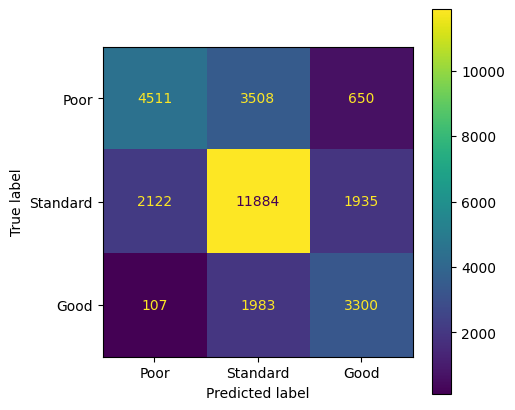

In [15]:
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

In [16]:
y_pred = lr.predict(x_test)

In [17]:
lr_f1_scores, lr_macro_f1, lr_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.58550198 0.71341097 0.58536585]
Macro-average F1 score: 0.6280929355758581
Weighted-average F1 score: 0.653444098072247


In [18]:
pd.DataFrame((lr.coef_).T ,df.drop('Credit_Score',axis=1).columns ).T

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History,Missed_Payment_Day
0,-0.183163,-0.111968,0.046553,-0.226630,0.639895,0.027618,1.692646,1.320680,0.382478,1.390727,...,0.117751,0.786436,0.062010,0.221116,-1.594683,-1.610991,0.572140,0.445764,-0.490778,0.485517
1,-0.094501,0.004719,0.029070,-0.037207,0.277248,-0.249569,0.207319,-0.665897,-0.242624,-0.185898,...,-2.377810,-0.857622,-0.014529,0.168626,-1.222439,-0.366543,0.058120,-0.091210,0.192322,-0.297422
2,0.277664,0.107249,-0.075623,0.263837,-0.917143,0.221951,-1.899964,-0.654782,-0.139854,-1.204829,...,2.260059,0.071186,-0.047481,-0.389741,2.817121,1.977534,-0.630261,-0.354554,0.298456,-0.188095


In [19]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,-1,0,-1,0,0,0,0,0,1,0,0,1,1,-1,0,0,-1,0,0,0


### Decision Tree

In [20]:
dt = DecisionTreeClassifier(max_depth=12)
dt.fit(x_train , y_train)
dt_score_train=dt.score(x_train , y_train)
dt_score_test=dt.score(x_test , y_test)

In [21]:
dt_score_train

0.7739

In [22]:
dt_score_test

0.7247

Training Accuracy DecisionTreeClassifier 77.39  Test Accuracy DecisionTreeClassifier 72.47


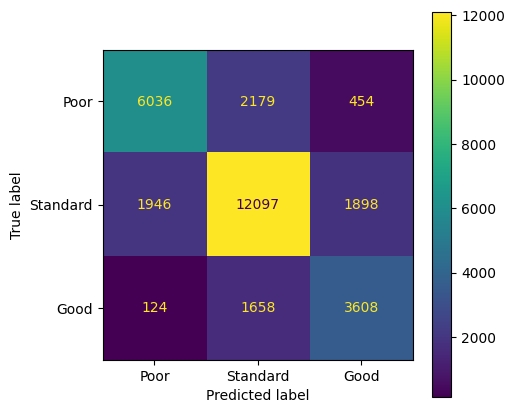

In [23]:
evaluate_classification(dt, "DecisionTreeClassifier", x_train,x_test,y_train,y_test)

In [24]:
y_pred = dt.predict(x_test)

In [25]:
dt_f1_scores, dt_macro_f1, dt_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.71964232 0.75902745 0.63577093]
Macro-average F1 score: 0.7048135669929169
Weighted-average F1 score: 0.7255013732292694


In [26]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,-1,0,-1,1,0,0,0,0,0,0,-1,0,0,-1,0,0,0,-1,0,0


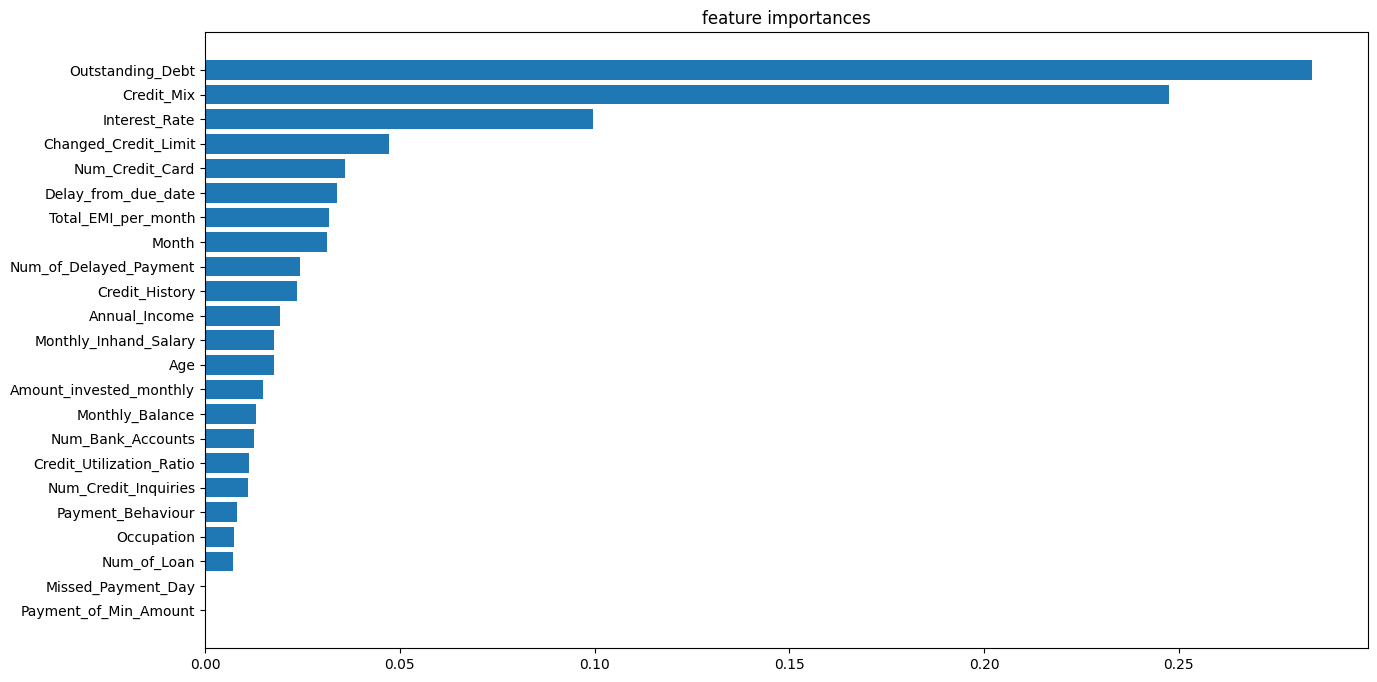

In [27]:
feature_importances(abs(dt.feature_importances_), features)

### KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train , y_train)
knn_score_train=knn.score(x_train , y_train)
knn_score_test=knn.score(x_test , y_test)

In [29]:
knn_score_train

0.7916428571428571

In [30]:
knn_score_test

0.7139666666666666

Training Accuracy KNeighborsClassifiern 79.16428571428571  Test Accuracy KNeighborsClassifiern 71.39666666666666


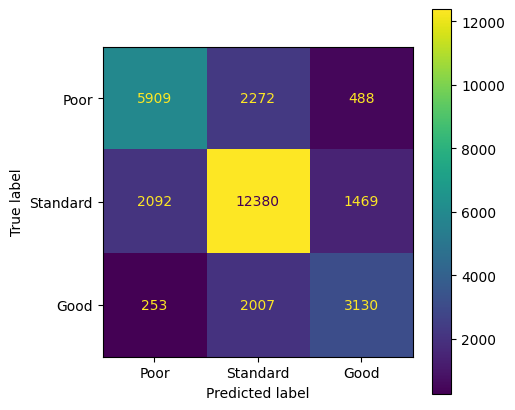

In [31]:
evaluate_classification(knn, "KNeighborsClassifiern", x_train,x_test,y_train,y_test)

In [32]:
y_pred = knn.predict(x_test)

In [33]:
knn_f1_scores, knn_macro_f1, knn_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.69833954 0.7595092  0.59749928]
Macro-average F1 score: 0.6851160081690676
Weighted-average F1 score: 0.7127254263994292


In [34]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,0,0,-1,0,0,0,0,0,1,0,0,0,-1,-1,0,0,0,-1,0,-1


### Random Forest

In [119]:
rf = RandomForestClassifier(max_depth=12)
rf.fit(x_train , y_train)
rf_score_train=rf.score(x_train , y_train)
rf_score_test=rf.score(x_test , y_test)

In [120]:
rf_score_train

0.7804142857142857

In [121]:
rf_score_test

0.7402

Training Accuracy RandomForestClassifier 78.04142857142857  Test Accuracy RandomForestClassifier 74.02


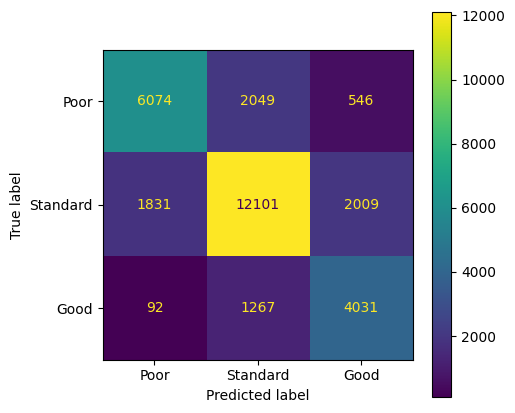

In [122]:
evaluate_classification(rf, "RandomForestClassifier", x_train,x_test,y_train,y_test)

In [123]:
y_pred = rf.predict(x_test)

In [124]:
rf_f1_scores, rf_macro_f1, rf_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.72890916 0.77179667 0.67317969]
Macro-average F1 score: 0.7246285065970218
Weighted-average F1 score: 0.7416854249339406


In [125]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,0,1,0,2,1,1,1,1,1,1,0,2,2,0,1,1,0,0,1,0
Y_pred,0,1,0,2,1,1,1,1,2,1,0,2,2,0,1,1,1,1,1,0


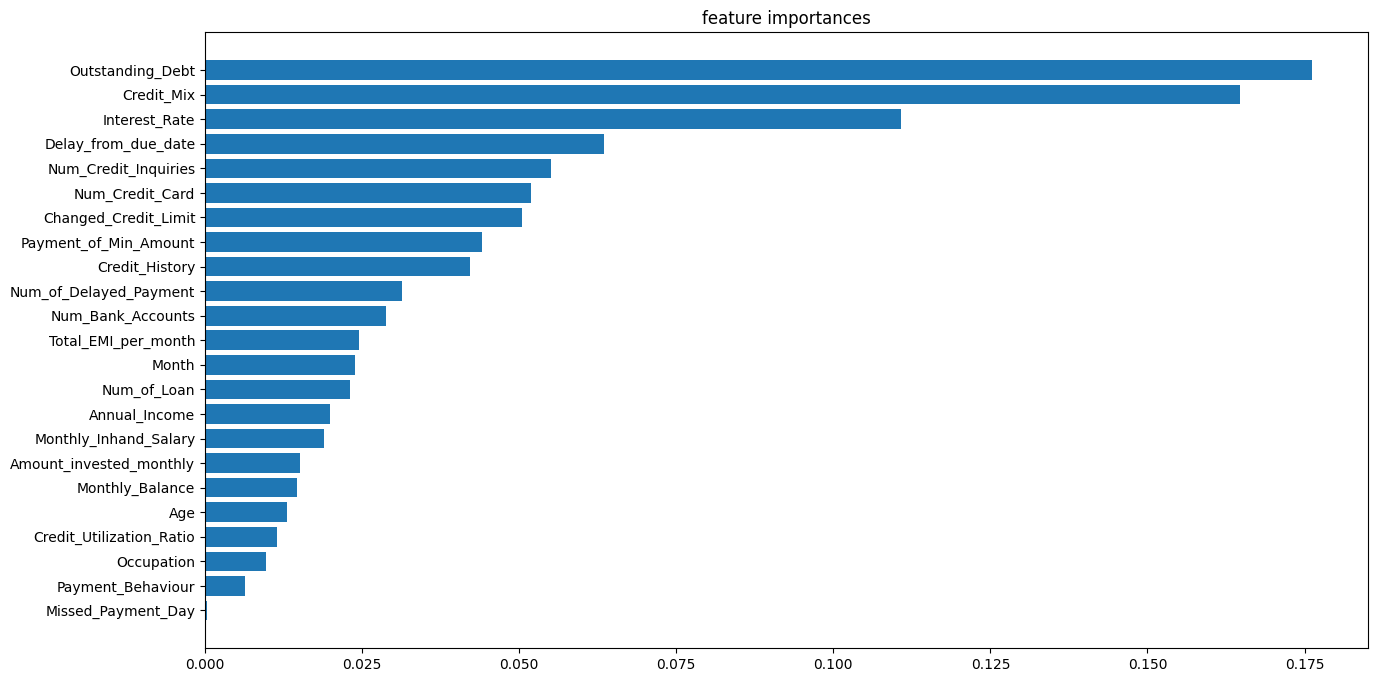

In [126]:
feature_importances(abs(rf.feature_importances_), features)

### AdaBoost

In [43]:
ada = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)
ada.fit(x_train, y_train)
ada_score_train=ada.score(x_train, y_train)
ada_score_test=ada.score(x_test, y_test)

In [44]:
ada_score_train

0.6279285714285714

In [45]:
ada_score_test

0.6267

Training Accuracy adaboost 62.79285714285714  Test Accuracy adaboost 62.67


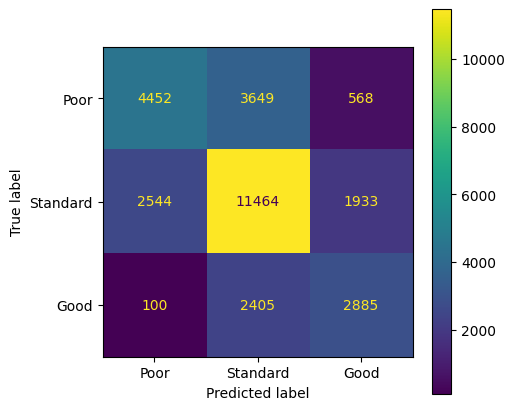

In [46]:
evaluate_classification(ada, "adaboost", x_train,x_test,y_train,y_test)

In [47]:
y_pred = ada.predict(x_test)

In [48]:
ada_f1_scores, ada_macro_f1, ada_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.56479543 0.68525658 0.53544915]
Macro-average F1 score: 0.5951670539517466
Weighted-average F1 score: 0.6235319230279707


In [49]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,-1,0,-1,0,0,0,0,0,1,0,0,1,1,-1,0,0,-1,0,0,-1


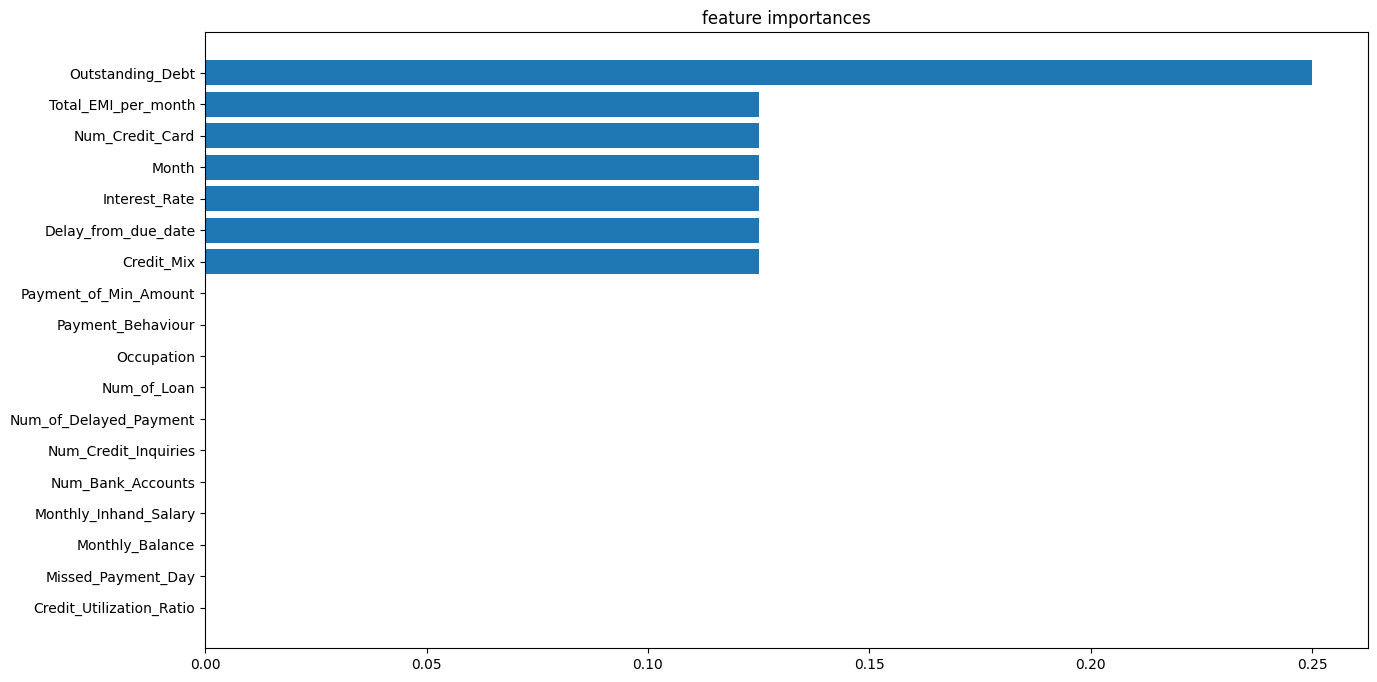

In [50]:
feature_importances(abs(ada.feature_importances_), features, top=18)

### XGBoost

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y_Encode, test_size=0.3,random_state = 1234)
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgb.fit(x_train , y_train)
xgb_score_train=xgb.score(x_train , y_train)
xgb_score_test=xgb.score(x_test , y_test)

In [52]:
xgb_score_train

0.7154571428571429

In [53]:
xgb_score_test

0.7141

Training Accuracy XGBOOST 71.5457142857143  Test Accuracy XGBOOST 71.41


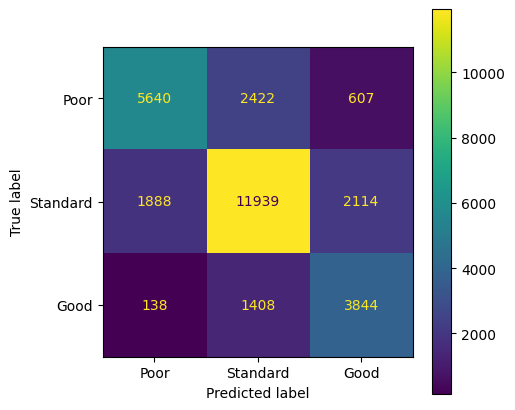

In [54]:
evaluate_classification(xgb, "XGBOOST", x_train,x_test,y_train,y_test)

In [55]:
y_pred = xgb.predict(x_test)

In [56]:
xgb_f1_scores, xgb_macro_f1, xgb_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.69054178 0.75301167 0.64307821]
Macro-average F1 score: 0.6955438865494409
Weighted-average F1 score: 0.7152085752839525


In [57]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,0,1,0,2,1,1,1,1,1,1,0,2,2,0,1,1,0,0,1,0
Y_pred,0,1,0,2,1,1,1,1,2,1,0,2,2,0,1,1,1,1,1,0


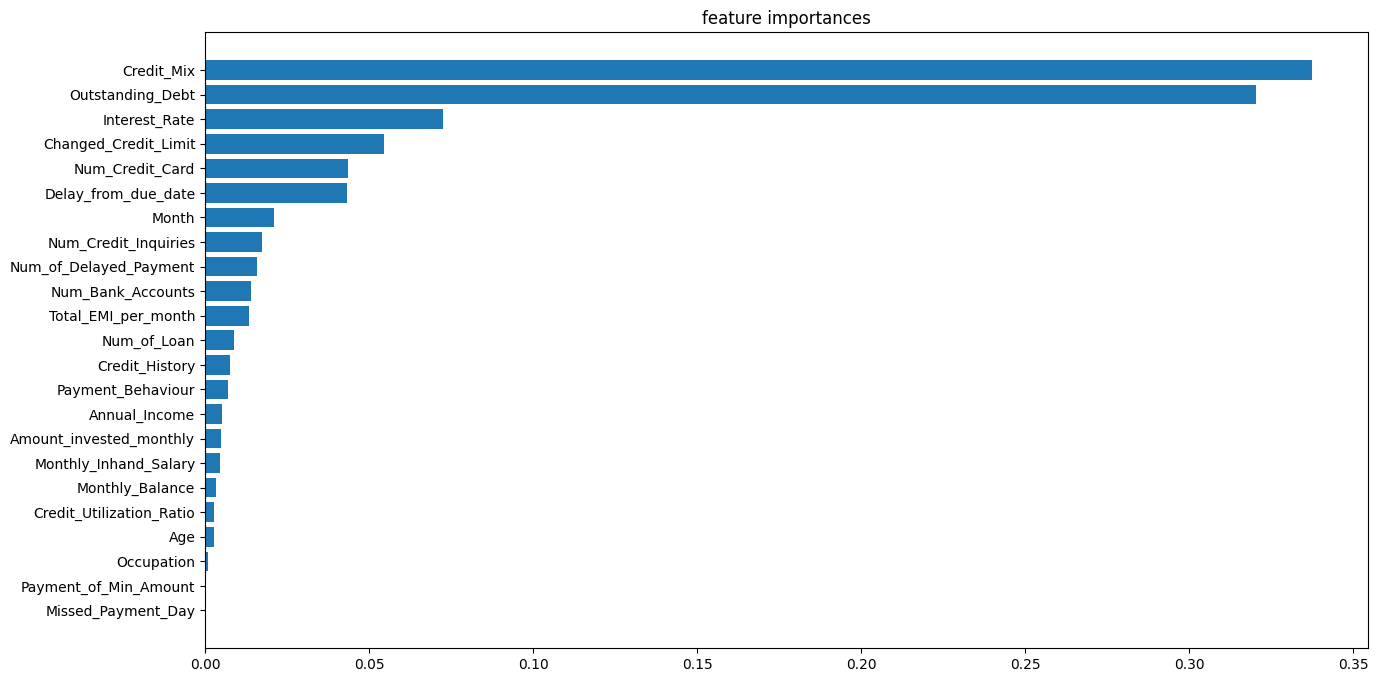

In [58]:
feature_importances(abs(xgb.feature_importances_), features)

### Voting Classifier

In [59]:
clf1 = LogisticRegression(C = 100)
clf2 = DecisionTreeClassifier(max_features=14 , max_depth=12)
clf3 = KNeighborsClassifier(n_neighbors=7)
clf4 = RandomForestClassifier(max_features=15 , max_depth=12)
clf5 = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)
clf6 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [60]:
voting = VotingClassifier(estimators=[("LogisticRegression" , clf1), ("DecisionTreeClassifier", clf2),
                                     ('KNeighborsClassifier' , clf3), ("RandomForestClassifier", clf4),
                                     ("AdaBoostClassifier",clf5), ("XGBClassifier" , clf6)] , voting = "hard")

In [61]:
voting.fit(x_train , y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LogisticRegression', LogisticRegression(C=100)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(max_depth=12,
                                                     max_features=14)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=7)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=12,
                                                     max_features=15)),
                             ('AdaBoostClassifier',
                              AdaBoostClassifier(learning_r...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...))])

In [62]:
voting_score_train = voting.score(x_train, y_train)
voting_score_test = voting.score(x_test, y_test)

In [63]:
voting_score_train

0.7665142857142857

In [64]:
voting_score_test

0.729

Training Accuracy Voting 76.65142857142857  Test Accuracy Voting 72.89999999999999


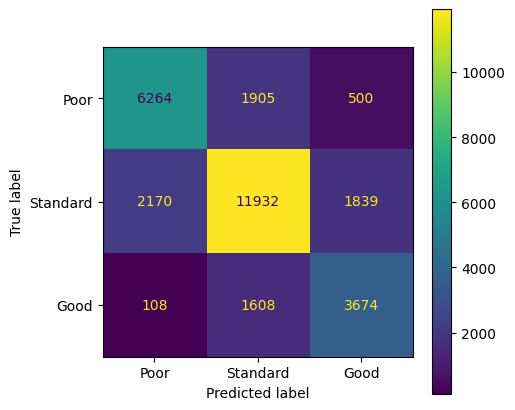

In [65]:
evaluate_classification(voting, "Voting", x_train,x_test,y_train,y_test)

In [66]:
y_pred = voting.predict(x_test)

In [67]:
v_f1_scores, v_macro_f1, v_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.72790657 0.760339   0.64439183]
Macro-average F1 score: 0.7108791342475979
Weighted-average F1 score: 0.7301352695471772


In [68]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,0,1,0,2,1,1,1,1,1,1,0,2,2,0,1,1,0,0,1,0
Y_pred,0,1,0,1,1,1,1,1,2,1,0,2,2,0,1,1,0,1,1,0


## HyperPararmeter Tuning
### Random Forest

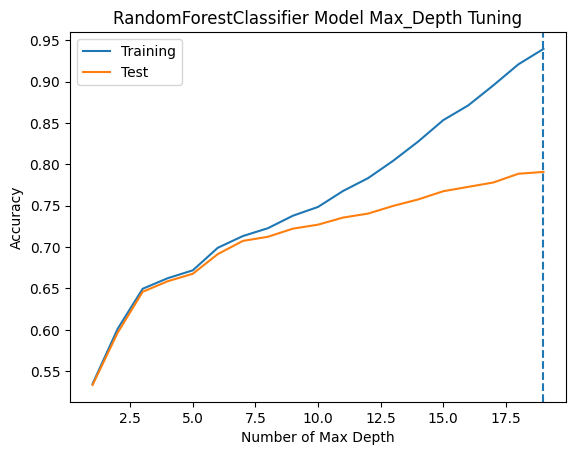

In [82]:
rfc = RandomForestClassifier(random_state=42)
training_acc, test_acc = model_tuning(rfc, x_train, y_train, x_test, y_test, max_depth_range)

In [127]:
rfc_score_train = rfc.score(x_train, y_train)
rfc_score_test = rfc.score(x_test, y_test)

### Decision Tree

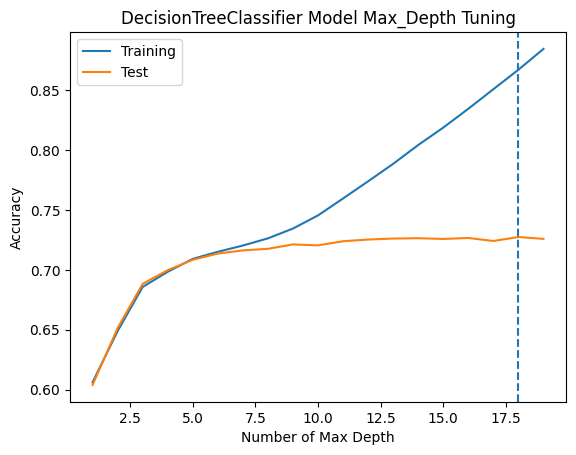

In [99]:
dtc = DecisionTreeClassifier(random_state=42)
training_acc, test_acc = model_tuning(dtc, x_train, y_train, x_test, y_test, max_depth_range)

In [130]:
dtc_score_train = dtc.score(x_train, y_train)
dtc_score_test = dtc.score(x_test, y_test)

### K-Nearest Neighbors

In [107]:
train_accuracies={}
test_accuracies={}
neighbors=np.arange(1,20)

for neighbor in neighbors:

    knnc=KNeighborsClassifier(n_neighbors=neighbor)
    knnc.fit(x_train, y_train)
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)

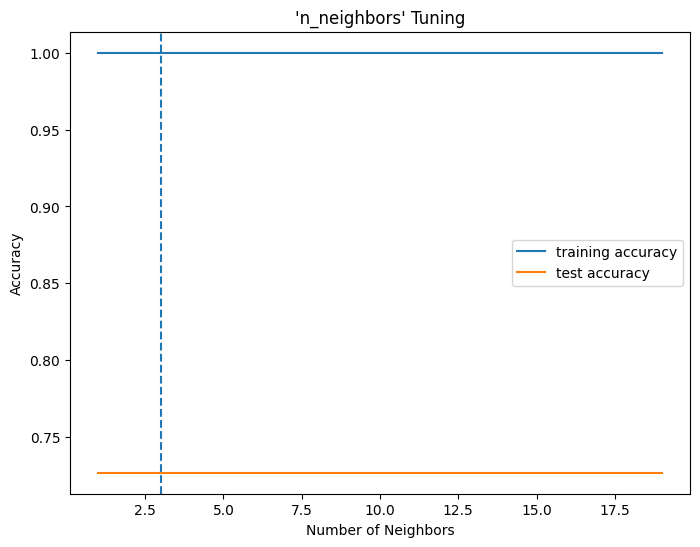

In [108]:
# Visualizing Model Complexity 
plt.figure(figsize=(8,6))
plt.title("'n_neighbors' Tuning")
plt.plot(neighbors, train_accuracies.values(), label="training accuracy"),
plt.plot(neighbors, test_accuracies.values(), label="test accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.axvline(x=3,linestyle="--")
plt.ylabel("Accuracy")
plt.show()

In [131]:
knnc_score_train = knnc.score(x_train, y_train)
knnc_score_test = knnc.score(x_test, y_test)

### XGBoost

In [112]:
def model_tuning(model, x_train, y_train, x_test, y_test, param_name, param_range):
    training_acc={}
    test_acc={}
    
    for param_value in param_range:
        model.set_params(**{param_name: param_value})
        model.fit(x_train, y_train)

        training_acc[param_value] = model.score(x_train, y_train)
        test_acc[param_value] = model.score(x_test, y_test)

    # visualize test and training accuracies
    fig, ax = plt.subplots()
    ax.plot(param_range, training_acc.values(), label="Training")
    ax.plot(param_range, test_acc.values(), label="Test")
    plt.legend(["Training","Test"])
    plt.title(f"{model.__class__.__name__} Model {param_name.capitalize()} Tuning")
    plt.xlabel(f"{param_name.capitalize()} Values")
    plt.ylabel("Accuracy")
    plt.axvline(x=max(test_acc, key=test_acc.get), linestyle="--")
    plt.show()
    
    return training_acc, test_acc

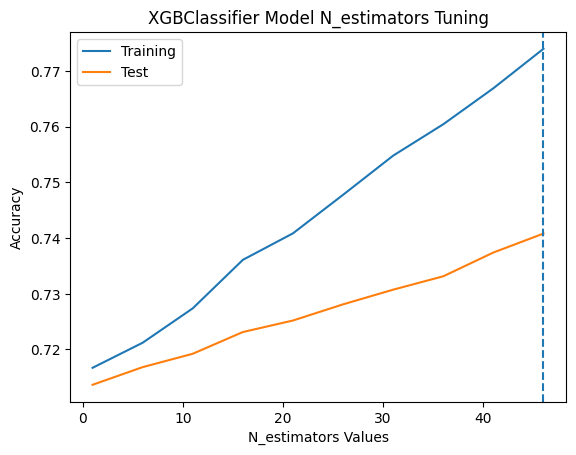

In [115]:
xgbc = XGBClassifier(random_state=42)

param_name = "n_estimators"
param_range = np.arange(1, 50, 5)

training_acc, test_acc = model_tuning(xgb, x_train, y_train, x_test, y_test, param_name, param_range)

In [134]:
xgbc.fit(x_train,y_train)
xgbc_score_train = xgbc.score(x_train, y_train)
xgbc_score_test = xgbc.score(x_test, y_test)

### Adaboost

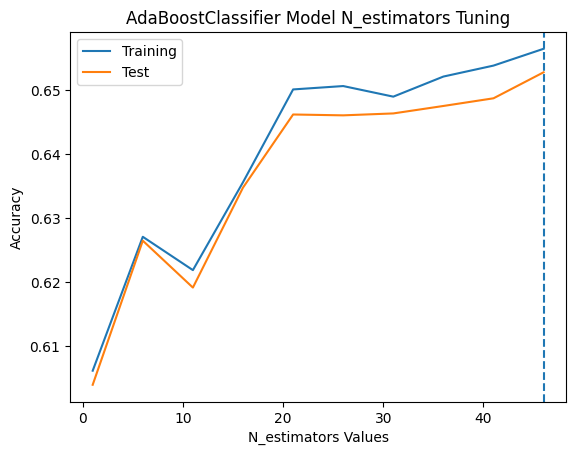

In [118]:
dthc = DecisionTreeClassifier(max_depth=1, random_state=42)
adac = AdaBoostClassifier(base_estimator=dthc, random_state=42)

param_name = "n_estimators"
param_range = np.arange(1, 50, 5)

training_acc, test_acc = model_tuning(adac, x_train, y_train, x_test, y_test, param_name, param_range)

In [135]:
adac_score_train = adac.score(x_train, y_train)
adac_score_test = adac.score(x_test, y_test)

### Accuracy Score

In [138]:
models = ['Logistic Regression' , 'KNN' , 'Decision Tree','Voting Classifier','Random Forest', 'AdaBoost', 'XGBoost']
score = [[lr_score_train ,lr_score_test ], [knn_score_train ,knn_score_test ], [dt_score_train ,dt_score_test ], 
       [voting_score_train, voting_score_test], [rf_score_train,rf_score_test], [ada_score_train ,ada_score_test],
       [xgb_score_train,xgb_score_test]]

# Rounding up each score to 4 decimal places
for i in range(len(score)):
    for j in range(len(score[i])):
        score[i][j] = round(score[i][j], 4)

cols = ["Train Score" , "Test Score"]
pd.DataFrame(data = score , index = models , columns= cols).sort_values(ascending= False , by = ["Test Score","Train Score"])

,Train Score,Test Score
Random Forest,0.7804,0.7402
Voting Classifier,0.7665,0.7290
Decision Tree,0.7739,0.7247
XGBoost,0.7155,0.7141
KNN,0.7916,0.7140
Logistic Regression,0.6600,0.6565
AdaBoost,0.6279,0.6267


### F1 Score

In [137]:
models = ['Logistic Regression' , 'KNN' , 'Decision Tree','Voting Classifier','Random Forest', 'AdaBoost', 'XGBoost']
score = [[lr_macro_f1, lr_weighted_f1], [knn_macro_f1, knn_weighted_f1], [dt_macro_f1, dt_weighted_f1], [v_macro_f1, v_weighted_f1], 
        [rf_macro_f1, rf_weighted_f1], [ada_macro_f1, ada_weighted_f1], [xgb_macro_f1, xgb_weighted_f1]]

# Rounding up each score to 4 decimal places
for i in range(len(score)):
    for j in range(len(score[i])):
        score[i][j] = round(score[i][j], 4)

cols = ["Macro - Average (F1 Score)" , "Weighted - Average (F1 Score)"]
pd.DataFrame(data = score , index = models , columns= cols).sort_values(ascending= False , by = ["Macro - Average (F1 Score)" , "Weighted - Average (F1 Score)"])


,Macro - Average (F1 Score),Weighted - Average (F1 Score)
Random Forest,0.7246,0.7417
Voting Classifier,0.7109,0.7301
Decision Tree,0.7048,0.7255
XGBoost,0.6955,0.7152
KNN,0.6851,0.7127
Logistic Regression,0.6281,0.6534
AdaBoost,0.5952,0.6235


### Tuned Accuracy Score

In [136]:
models = ['KNN' , 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
score = [[knnc_score_train ,knnc_score_test ], [dtc_score_train ,dtc_score_test], 
         [rfc_score_train,rfc_score_test], [adac_score_train ,adac_score_test],
         [xgbc_score_train,xgbc_score_test]]

# Rounding up each score to 4 decimal places
for i in range(len(score)):
    for j in range(len(score[i])):
        score[i][j] = round(score[i][j], 4)

cols = ["Tuned Train Score" , "Tuned Test Score"]
pd.DataFrame(data = score , index = models , columns= cols).sort_values(ascending= False , by = ["Tuned Train Score" , "Tuned Test Score"])

,Tuned Train Score,Tuned Test Score
Random Forest,0.9394,0.7908
Decision Tree,0.8844,0.7258
XGBoost,0.8283,0.7658
KNN,0.7393,0.7043
AdaBoost,0.6564,0.6528


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=762520ba-b8cf-4151-96d5-65e8763600e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>